In [1]:
from numpy import frompyfunc, linspace, sqrt, exp, log, pi, zeros, arange
from mpmath import polylog
from scipy.integrate import quad
from pylab import cm
from matplotlib.ticker import AutoMinorLocator

# Specific treatment for polylogarithm function
plog = frompyfunc(polylog, 2, 1)

# Call plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 2

# Generate 2 colors from the 'Set1' colormap
colors = mpl.colormaps['tab10'](2)

infty = 100
T = 300 #Temperature in K
kB = 0.00008617 #Bolztman constant in eV/K
kBT = kB*T
f = 10 #Conduction 17.40867685
Deltac = 0.01 #Conduction -0.08040215
a = 17 #mexican 17
b = 5000 #5000
#a = 7.2
#b = 690
d = 0.03 #Mexican 0.03
db = d/kBT
Dc = Deltac/kBT
E0 = (a**2)/(4*b*kBT) + db

In [2]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import sys

#This function extracts the high symmetry points from the output of bandx.out
def Symmetries(fstring): 
  f = open(fstring,'r')
  x = np.zeros(0)
  for i in f:
    if "high-symmetry" in i:
      x = np.append(x,float(i.split()[-1]))
  f.close()
  return x
# This function takes in the datafile, the fermi energy, the symmetry file, a subplot, and the label
# It then extracts the band data, and plots the bands, the fermi energy in red, and the high symmetry points
def bndplot(datafile,fermi,symmetryfile,subplot,**kwargs):
  ## necessary:
  # datafile is the bands.dat.gnu file generated from band.x
  # fermi is the Fermi energy
  # symmetryfile is the standard output file of band.x (bands.pp.out)
  # subplot is the axes that you want to plot the band on

  ## optional:
  # use name_k_points=['L','G','X','U','G'] where G is Gamma point to label the high symmetry points. It must have the same length as the variable 'temp'
  # use shift_fermi=1 to shift the Fermi energy to zero
  # use color='black' to manually set the color of the band structure plot. Useful to plot two band structure together for comparison
  # use linestyle='dashed' to manually set the linestyle of the band structure plot. Useful to plot two band structure together for comparison
  # use range=[-5,5] to set the energy range for plotting the band structure
  # use legend='Si, PBE' to set the legend of the bands

  if 'shift_fermi' in kwargs:
    bool_shift_efermi = kwargs['shift_fermi']
  else:
    bool_shift_efermi = 0
  if 'color' in kwargs:
    color_bnd=kwargs['color']
  else:
    color_bnd='black'
  if 'linestyle' in kwargs:
    line_bnd=kwargs['linestyle']
  else:
    line_bnd='solid'
  
  z = np.loadtxt(datafile) #This loads the bandx.dat.gnu file
  x = np.unique(z[:,0]) #This is all the unique x-points
  bands = []
  bndl = len(z[z[:,0]==x[1]]) #This gives the number of bands in the calculation
  Fermi = float(fermi)
  if bool_shift_efermi:
    fermi_shift=Fermi
  else:
    fermi_shift=0
  axis = [min(x),max(x)]
  for i in range(0,bndl):
    bands.append(np.zeros([len(x),2])) #This is where we storre the bands
  for i in range(0,len(x)):
    sel = z[z[:,0] == x[i]]  #Here is the energies for a given x
    test = []
    for j in range(0,bndl): #This separates it out into a single band
      bands[j][i][0] = x[i]
      #bands[j][i][1] = np.multiply(sel[j][1],13.605698066)
      bands[j][i][1] = sel[j][1]
  for i in bands: #Here we plots the bands
    subplot.plot(i[:,0],i[:,1]-fermi_shift,color=color_bnd,linestyle=line_bnd)
  if 'legend' in kwargs:
    #empty plot to generate legend
    subplot.plot([None],[None],color=color_bnd,linestyle=line_bnd,label=kwargs['legend'])
  temp = Symmetries(symmetryfile)
  for j in temp: #This is the high symmetry lines
    x1 = [j,j]
    #x2 = [fermi-10,fermi+10]
    #subplot.plot(x1,x2,'--',lw=0.55,color='black',alpha=0.75)
    subplot.axvline(x=j,linestyle='solid',color='gray',alpha=0.5)
  subplot.plot([min(x),max(x)],[Fermi-fermi_shift,Fermi-fermi_shift],color='red',linestyle='dotted')
  subplot.set_xticks(temp)
  subplot.set_xticklabels([])
  if 'name_k_points' in kwargs:
    if len(kwargs['name_k_points'])==len(temp):
      subplot.set_xticklabels(kwargs['name_k_points'])
  if 'range' in kwargs:
    range_plot=kwargs['range']
    subplot.set_ylim([range_plot[0],range_plot[1]])
  subplot.set_xlim([axis[0],axis[1]])
  subplot.set_xlabel('k')
  subplot.set_ylabel('energy (eV)')
  if 'legend' in kwargs:
    subplot.legend()
  return bands

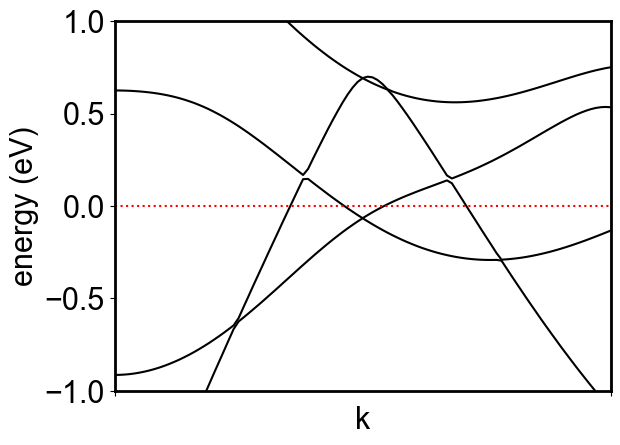

In [3]:
datafile='TiS.bands.gnu'
fermi = 13.1447
#fermi = 7.5
symmetryfile='TiS.bands.out'
bool_shift_efermi= True
fig, ax = plt.subplots()

#bndplot(datafile,fermi,symmetryfile,ax)
band = bndplot(datafile,fermi,symmetryfile,ax,shift_fermi=bool_shift_efermi,color='black',linestyle='solid',range=[-1,1])

#kc = band[19][:,0]
#Ekc = band[19][:,1]
#kv = band[18][:,0]
#Ekv = band[18][:,1]

kv = band[17][:, 0][58:124]
Ekv = band[17][:, 1][58:124]
kc = band[18][:, 0][58:124]
Ekc = band[18][:, 1][58:124]

#kvv = np.append(kv[100:150]-1.574,kv[0:50])
#Ekvv = np.append(Ekv[100:150],Ekv[0:50])
#kcc = np.append(kc[100:150]-1.574,kc[0:50])
#Ekcc = np.append(Ekc[100:150],Ekc[0:50])

apnd_v=np.append(kv[17:30]-0.9107,kc[30:51]-0.9107)
kvv=np.append(apnd_v,kv[51:61]-0.9107)
apnd_Ev=np.append(Ekv[17:30],Ekc[30:51])
Ekvv=np.append(apnd_Ev,Ekv[51:61])

apnd_c=np.append(kc[16:30]-0.9107,kv[31:50]-0.9107)
kcc=np.append(apnd_c,kc[51:62]-0.9107)
apnd_Ec=np.append(Ekc[16:30],Ekv[31:50])
Ekcc=np.append(apnd_Ec,Ekc[51:62])
